 # Making Noise
 In this paper we explore some noise making techniques, and apply them for map/texture making. 

In [713]:
import numpy as np 
import matplotlib.pyplot as plt 

## Explicit noise 
In this section we are not using any procedural technique to generate the noise, but we simply generate every single value of a matrix using numpy rand function. 
But whats happening behind the scenes? 

numpy genrates random sample using a well known algorithm called **Mersenne Twister**, based on linear recurrencies. 

In [714]:
#generate some simple noise 
simple_noise = np.random.rand(100,100)

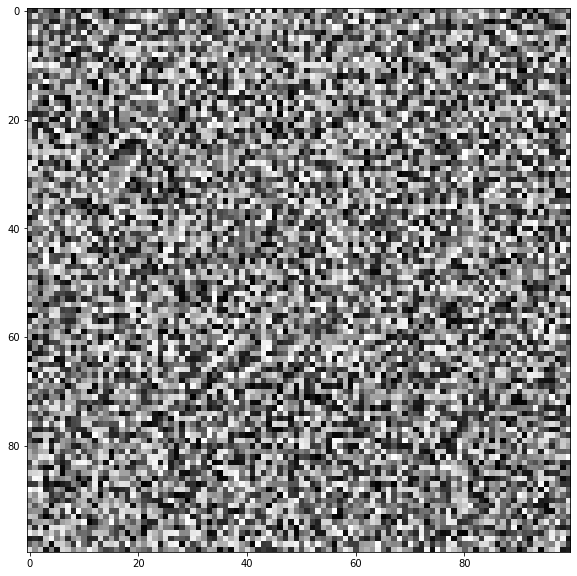

In [715]:
#matplotloib can directly plot numpy matrices, very handy
plt.figure(figsize=(10,10))
plt.imshow(simple_noise,cmap='gray')

### Noise up-scaling 


We are interested in producing noise textures, and simply extracting numbers is not enough. We want to have part of the images to have more noise and some part less, in short we'd like to simulate some complex textures starting from the uniform distribution we have created with numpy's random number generator. 

One of the simplest techniques to achieve this result is the following: 

1. Generate uniform noise matrices of different dimensions
2. Use upscaling to make all the smaller matrices with the same dimension as the biggest 
3. average the matrix together

In [716]:
# matrix averaging can be simpy done by summing and dividing by two (this can be done because numpy automatically vectorize the operators)
def matrix_average(mat1,mat2):
  return (mat1+mat2)/2

In [717]:
# upscaling the matrix is a more complex task. 
# The most straight forward approach uses the kroneker product

def upscale_matrix(mat,scale_factor = 2):
  return np.kron(mat, np.ones((scale_factor,scale_factor)))

The Kroneker product is a generalization of the outer product of matrices, if applied with the input matrix and a matrix made of ones, produces in output the input matrix upscaled by a factor corresponding to the one's matrix dimensions.

this can be simply understood with the example below :


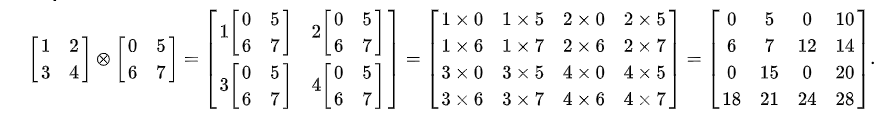

In [718]:
# At this point we test the operation
#define the dimension of the biggest matrices
dim = 120
fine_noise = np.random.rand(dim,dim)

In [719]:
#creathe smaller matrices and upscale it with the function we defined above
medium_noise = upscale_matrix(np.random.rand(int(dim/2),int(dim/2)),2)
large_noise = upscale_matrix(np.random.rand(int(dim/4),int(dim/4)) ,4)
very_large_noise = upscale_matrix(np.random.rand(int(dim/8),int(dim/8)) ,8)

In [720]:
#check the shapes
print(fine_noise.shape,medium_noise.shape,large_noise.shape,very_large_noise.shape)

(120, 120) (120, 120) (120, 120) (120, 120)


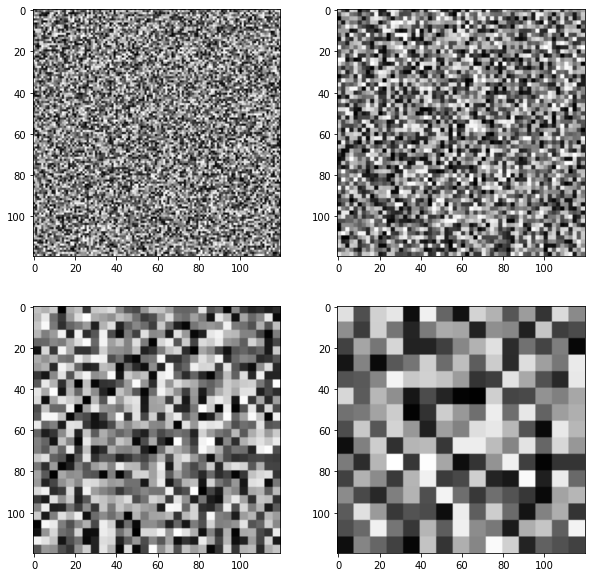

In [721]:
#print the results
f, ax = plt.subplots(2,2,figsize = (10,10)) 
ax[0,0].imshow(fine_noise,cmap = 'gray')
ax[0,1].imshow(medium_noise,cmap = 'gray')
ax[1,0].imshow(large_noise,cmap = 'gray')
ax[1,1].imshow(very_large_noise,cmap = 'gray')

In [722]:
#now average all the matrices and see the result 
result = matrix_average(matrix_average(matrix_average(fine_noise,medium_noise),large_noise),very_large_noise)

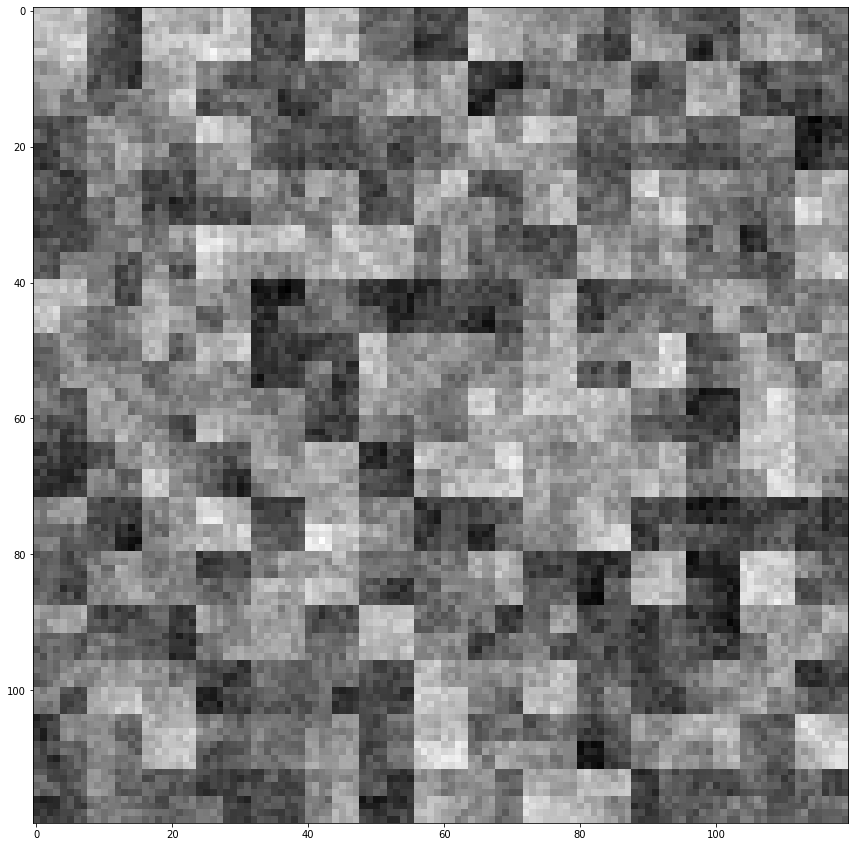

In [723]:
#not good yet, but getting better!
plt.figure(figsize=(15,15))
plt.imshow(result,cmap='gray')

### Noise smoothing 
the next improovement to be made is smoothing the noise, with this we can avoid the "pixelated" effect on the result. 
The first attempt we make is by making a gaussian filter. Of course smoothing filters are widely available. The most common library in python is possibly scipy which lets us use a variety of filters. Still, lets develop a simple gaussian kernel.

In [724]:
# we generate a 2d kernel by making the outer product of two 1d gaussian distributions. 
from scipy import signal

In [725]:
def gkern(kernlen=21, std=3):
    """Returns a 2D Gaussian kernel array."""
    gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

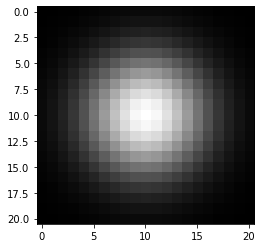

In [726]:
# plot the kernel the kernel 
plt.imshow(gkern(std=4),cmap='gray')

In [727]:
# now we need to convolve the kernel over the image, I'll use the scipy convolve function to do that. 
from scipy.ndimage import convolve

def gaussian_filter(image,kernel,sigma):
  return convolve(image, gkern(kernel,sigma))

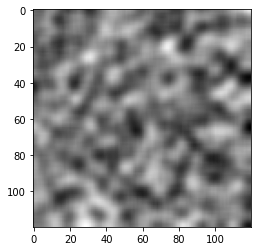

In [728]:
#check if the gaussian filter is working
plt.imshow(gaussian_filter(fine_noise,12,sigma=3),cmap='gray')
#it is!

In [729]:
# fix the kernel dimension
kernel = 12

# convolve all the layers of the noise, with different sigma values 
very_large_noise_f = gaussian_filter(very_large_noise,kernel, sigma=3)
large_noise_f = gaussian_filter(large_noise,kernel, sigma=2)
medium_noise_f = gaussian_filter(medium_noise,kernel, sigma=1)
fine_noise_f = gaussian_filter(fine_noise,kernel, sigma=1)

#and average the results 
result = matrix_average(matrix_average(matrix_average(fine_noise,medium_noise_f),large_noise_f),very_large_noise_f)

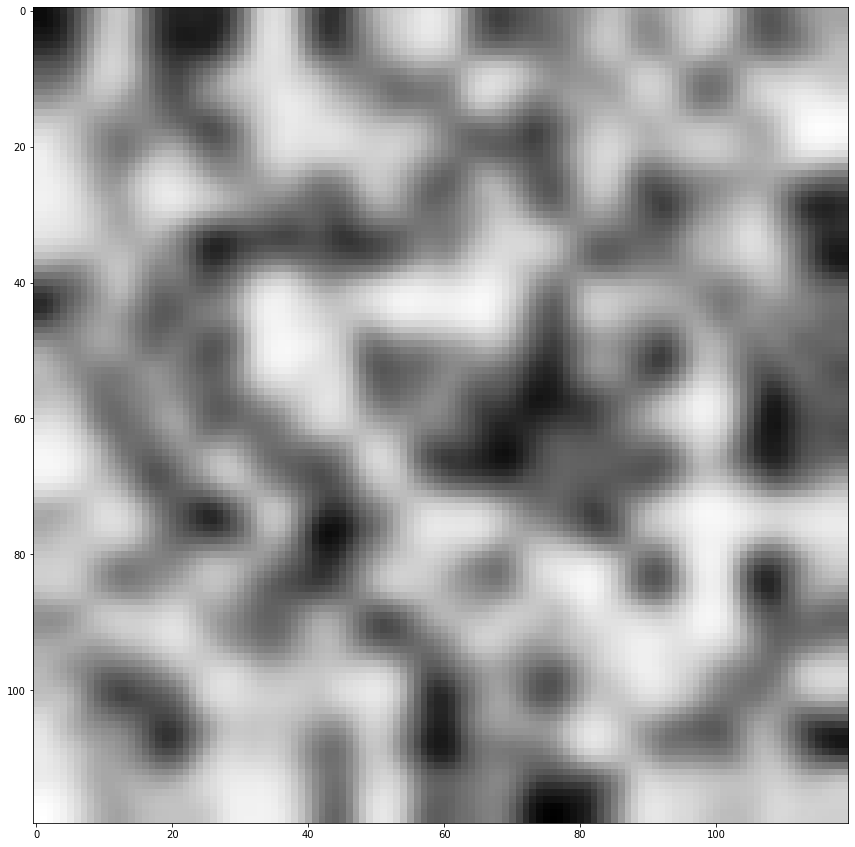

In [730]:
plt.figure(figsize=(15,15))
plt.imshow(result,cmap='Greys')

In [731]:
# and now lets apply the gaussian filter again on the averaged image
smoothed_result = gaussian_filter(result,60, sigma=15)

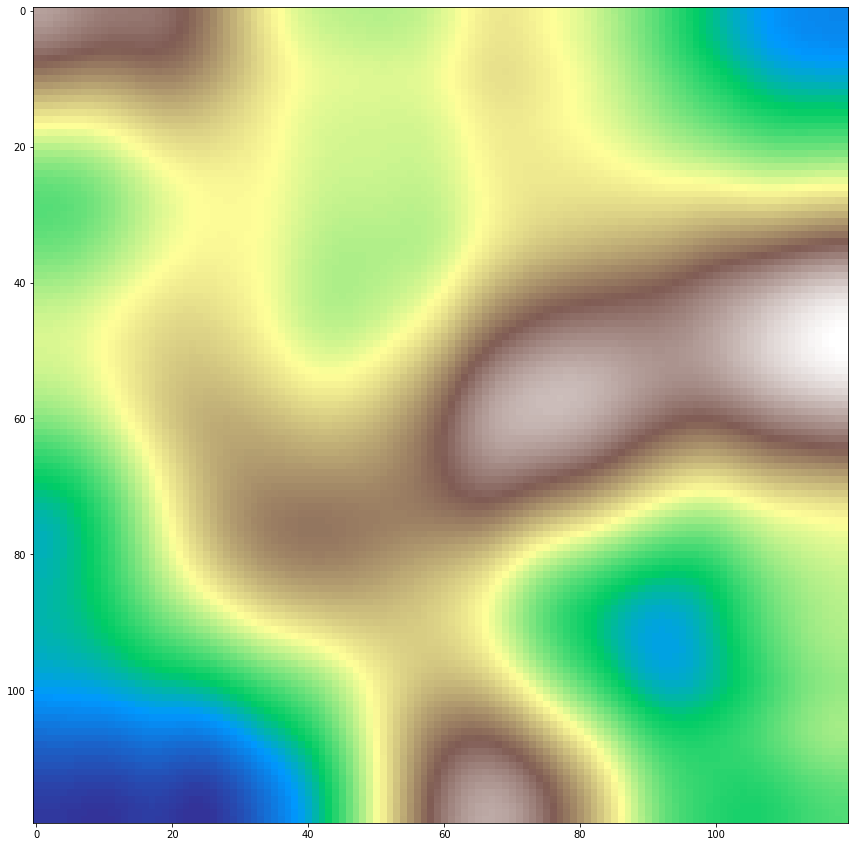

In [732]:
# plot the image with some terrain color gradient
# already included in matplotlib
plt.figure(figsize=(15,15))
plt.imshow(smoothed_result,cmap='terrain')

### 3d Plot the results 

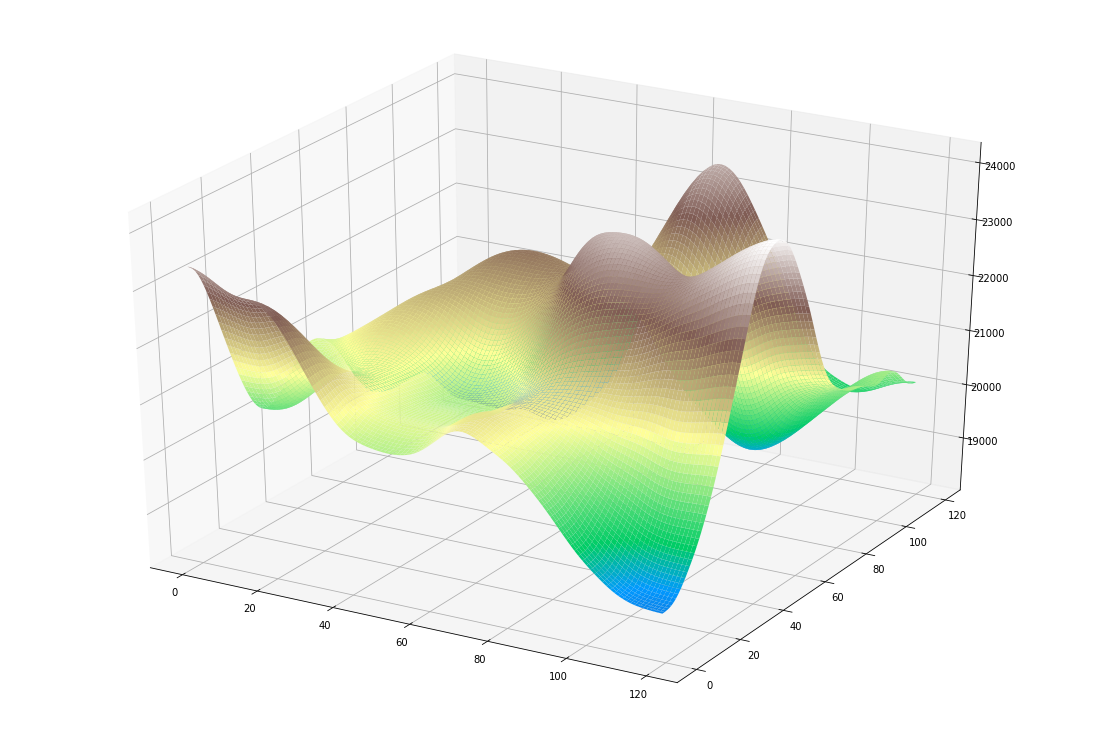

In [733]:
# using matplotlib 3d surface to plot the result 
from mpl_toolkits.mplot3d.axes3d import *
from matplotlib import cm

fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig)

#use a meshgrid to generate x and y coordinates, z are pulled straight from the matrix
X = np.arange(0, dim, 1)
Y = np.arange(0, dim, 1)
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, smoothed_result, rstride=1, cstride=1, cmap='terrain',linewidth=1, antialiased=True)
plt.show()

### Testing some other filters 

In [734]:
def blackmanharris_kern(kernlen=21):
    gkern1d = signal.blackmanharris(kernlen).reshape(kernlen, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

In [735]:
def bartlett_kern(kernlen=21):
    gkern1d = signal.bartlett(kernlen).reshape(kernlen, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

In [736]:
def cosine_kern(kernlen=21):
    gkern1d = signal.cosine(kernlen).reshape(kernlen, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

In [737]:
def barthann_kern(kernlen=21):
    gkern1d = signal.barthann(kernlen).reshape(kernlen, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

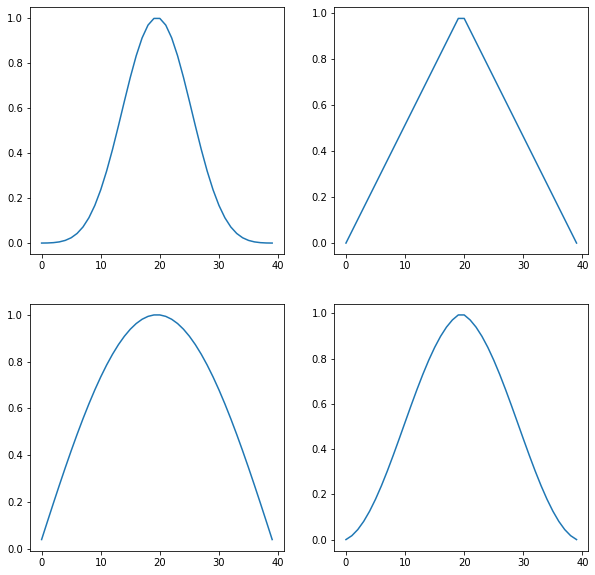

In [738]:
f, ax = plt.subplots(2,2,figsize = (10,10)) 
ax[0,0].plot(signal.blackmanharris(40))
ax[0,1].plot(signal.bartlett(40))
ax[1,0].plot(signal.cosine(40))
ax[1,1].plot(signal.barthann(40))

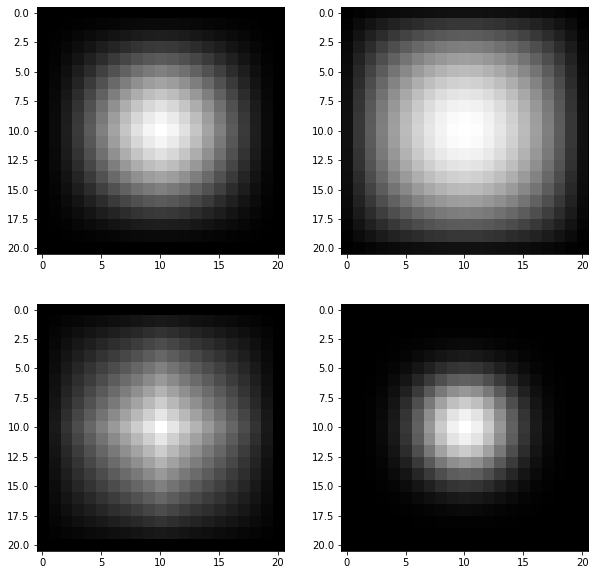

In [739]:
f, ax = plt.subplots(2,2,figsize = (10,10)) 
ax[0,0].imshow(barthann_kern(),cmap = 'gray')
ax[0,1].imshow(cosine_kern(),cmap = 'gray')
ax[1,0].imshow(bartlett_kern(),cmap = 'gray')
ax[1,1].imshow(blackmanharris_kern(),cmap = 'gray')

In [740]:
from scipy.ndimage import convolve

def blackmanharris_filter(image,kernel):
  return convolve(image, blackmanharris_kern(kernel))

def bartlett_filter(image,kernel):
  return convolve(image, bartlett_kern(kernel))

def cosine_filter(image,kernel):
  return convolve(image, cosine_kern(kernel))

def barthann_filter(image,kernel):
  return convolve(image, barthann_kern(kernel))

## Perlin Noise
In this second part of the paper we discuss some procedural noise techniques, and in particular the Perlin Noise algorithm. 

typically, a Perlin noise algorithm is made of 3 main steps : 
1. defining a grid of random gradient vectors
2. computing the dot product between the gradient vectors and their offsets
3. interpolation between these values

Implementation of the algothms are available, I'm particularly thankful to this resource(https://adrianb.io/2014/08/09/perlinnoise.html) for the following implementation. 

### The Algorithm 

In [741]:
#linear interpolation 
def lin_interp(a,b,x):
    return a + x * (b-a)

In [742]:
# a fade function is needed to smooth the linear interpolation 
# this specific function was propoes in the original paper 6^t5-15^t4+10^t3
def fade_function(t):
    return 6 * t**5 - 15 * t**4 + 10 * t**3

In [743]:
def gradient(h,x,y):
    "grad converts h to the right gradient vector and return the dot product with (x,y)"
    vectors = np.array([[0,1],[0,-1],[1,0],[-1,0]])
    g = vectors[h%4]
    return g[:,:,0] * x + g[:,:,1] * y

In [744]:
def perlin(x,y,seed=0):
    #create a 2d permutation table with numpy
    p = np.random.randint(0, 255, size=(512,), dtype=int)

    # coordinates of the top-left
    xi = x.astype(int)
    yi = y.astype(int)

    # internal coordinates
    xf = x - xi
    yf = y - yi

    # fade the coordinates 
    u = fade_function(xf)
    v = fade_function(yf)
    # noise components
    n00 = gradient(p[p[xi]+yi],xf,yf)
    n01 = gradient(p[p[xi]+yi+1],xf,yf-1)
    n11 = gradient(p[p[xi+1]+yi+1],xf-1,yf-1)
    n10 = gradient(p[p[xi+1]+yi],xf-1,yf)
    # combine noises
    x1 = lin_interp(n00,n10,u)
    x2 = lin_interp(n01,n11,u) 
    return lin_interp(x1,x2,v) 

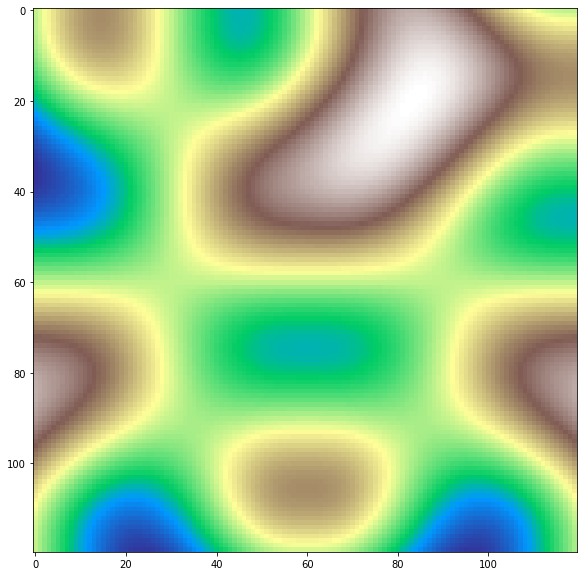

In [745]:
#set the dimension 
local_dim = 120 

lin = np.linspace(0,2,local_dim,endpoint=False)
x,y = np.meshgrid(lin,lin) 
plt.figure(figsize=(10,10))
perlin_result = perlin(x,y,seed=2)
plt.imshow(perlin(x,y,seed=2),origin='upper',cmap='terrain')

### 3d Plot the results 

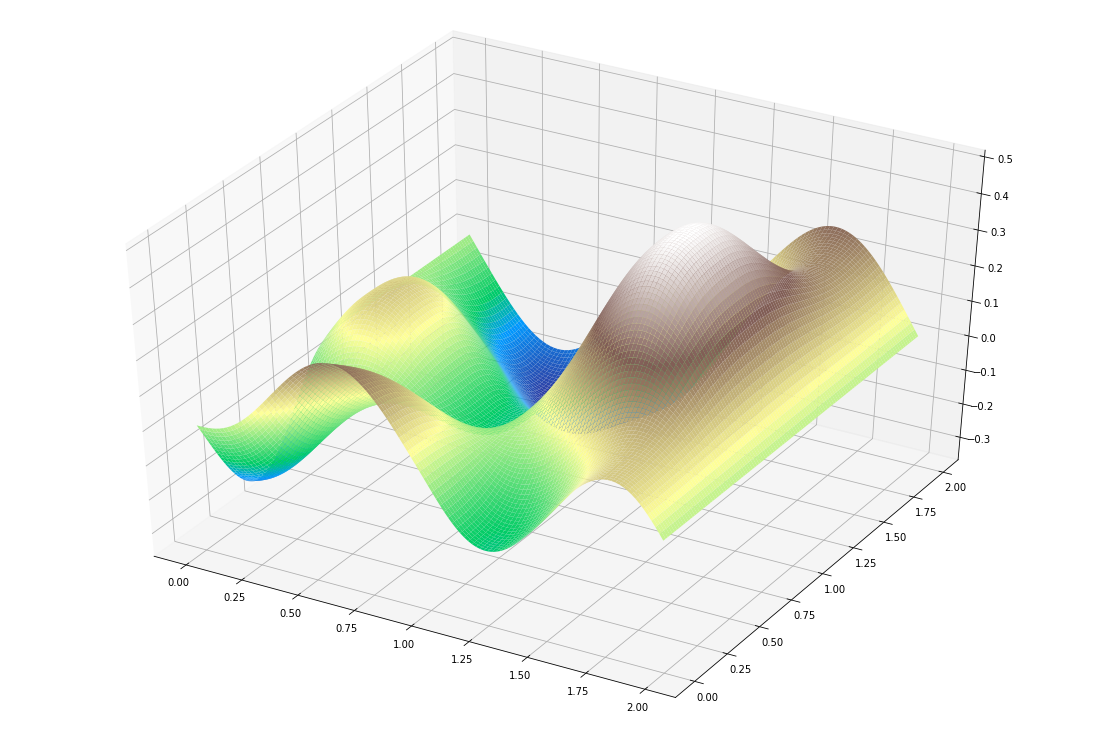

In [746]:
from mpl_toolkits.mplot3d.axes3d import *
from matplotlib import cm

fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig)

X = np.arange(0, dim, 1)
Y = np.arange(0, dim, 1)
X, Y = np.meshgrid(lin, lin)
ax.plot_surface(X, Y, perlin_result, rstride=1, cstride=1, cmap='terrain',linewidth=1, antialiased=True)
ax.view_init(elev=40)
plt.show()

## Final Results 
In this final section we explore some different results obtained with the techniques above. 

Perlin patterns

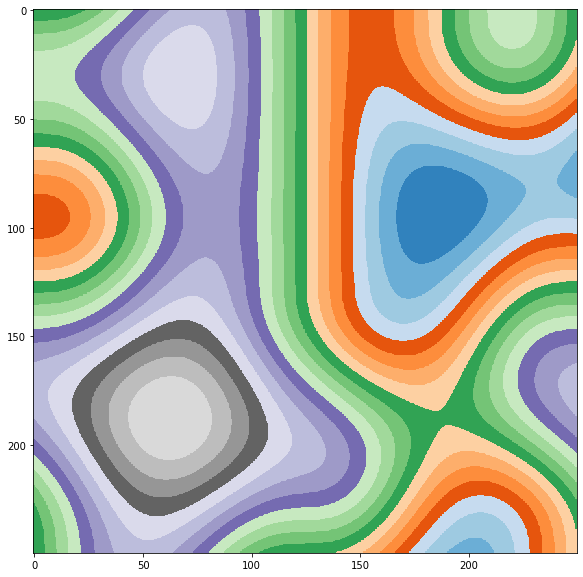

In [747]:
#set the dimension 
loc_dim = 250 

lin = np.linspace(0,2,loc_dim,endpoint=False)
x,y = np.meshgrid(lin,lin) 
plt.figure(figsize=(10,10))
result = perlin(x,y,seed=2)
plt.imshow(perlin(x,y,seed=2),origin='upper',cmap='tab20c')

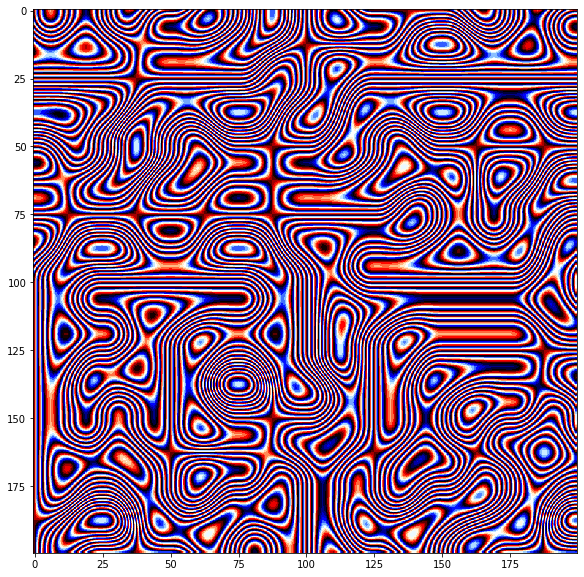

In [748]:
#set the dimension 
loc_dim = 200 

lin = np.linspace(0,8,loc_dim,endpoint=False)
x,y = np.meshgrid(lin,lin) 
plt.figure(figsize=(10,10))
result = perlin(x,y,seed=2)
plt.imshow(perlin(x,y,seed=2),origin='upper',cmap='flag')

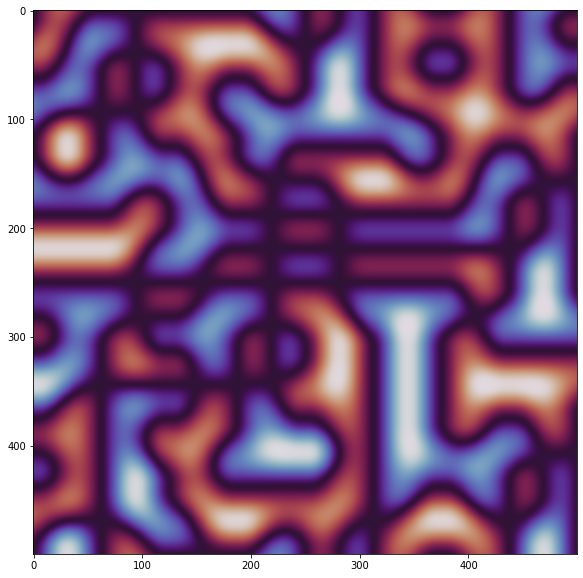

In [749]:
#set the dimension 
loc_dim = 500

lin = np.linspace(0,8,loc_dim,endpoint=False)
x,y = np.meshgrid(lin,lin) 
plt.figure(figsize=(10,10))
result = perlin(x,y,seed=2)
plt.imshow(perlin(x,y,seed=2),origin='upper',cmap='twilight')

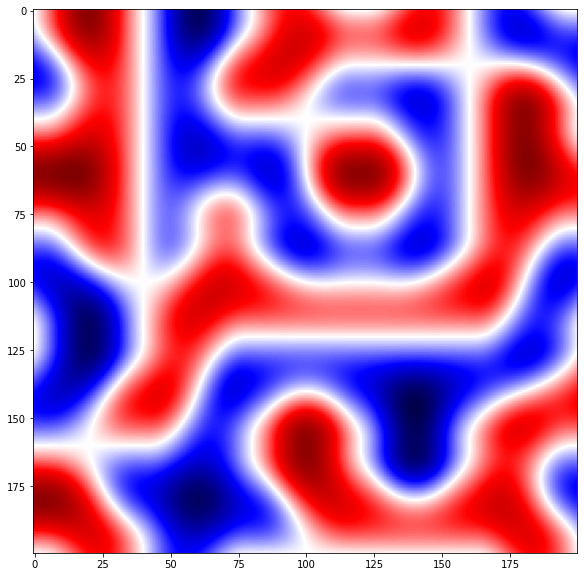

In [750]:
#set the dimension 
loc_dim = 200

lin = np.linspace(0,5,loc_dim,endpoint=False)
x,y = np.meshgrid(lin,lin) 
plt.figure(figsize=(10,10))
result = perlin(x,y,seed=2)
plt.imshow(cosine_filter(perlin(x,y,seed=2),1),origin='upper',cmap='seismic')

### Maps

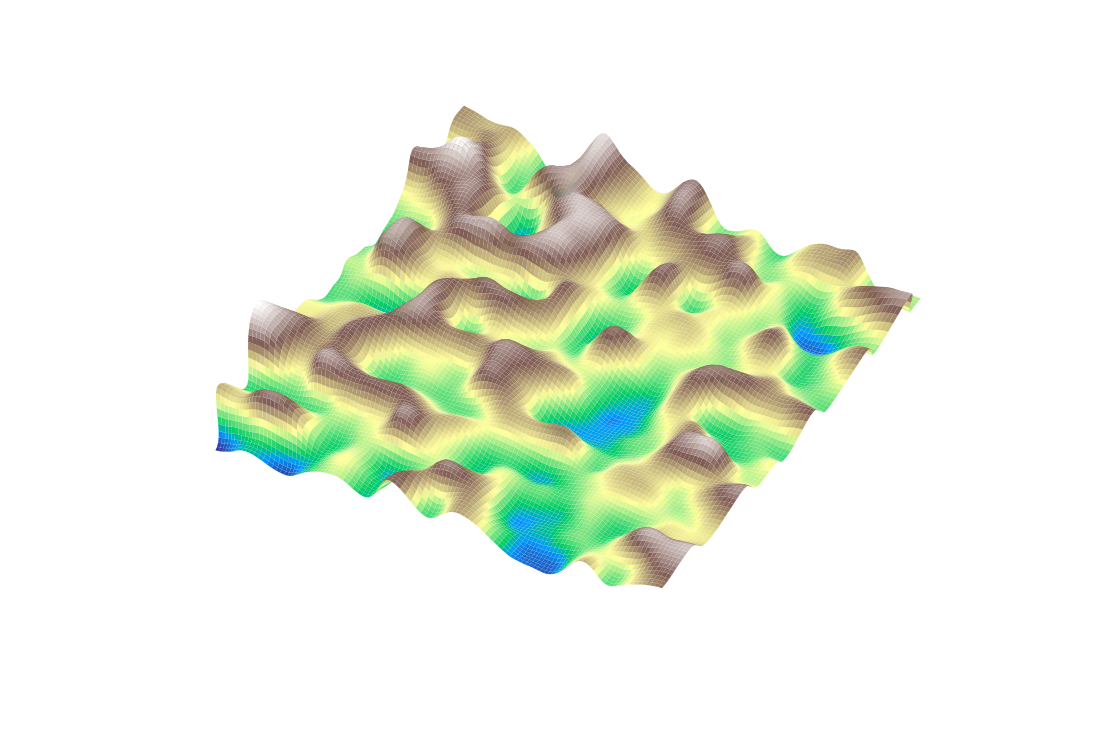

In [751]:
from mpl_toolkits.mplot3d.axes3d import *
from matplotlib import cm

# fix the kernel dimension
kernel = 20
dim = 120
fine_noise = np.random.rand(dim,dim)
#creathe smaller matrices and upscale it with the function we defined above
medium_noise = upscale_matrix(np.random.rand(int(dim/2),int(dim/2)),2)
large_noise = upscale_matrix(np.random.rand(int(dim/4),int(dim/4)) ,4)
very_large_noise = upscale_matrix(np.random.rand(int(dim/8),int(dim/8)) ,8)
# convolve all the layers of the noise, with different sigma values 
very_large_noise_f = gaussian_filter(very_large_noise,kernel, sigma=3)
large_noise_f = gaussian_filter(large_noise,kernel, sigma=2)
medium_noise_f = gaussian_filter(medium_noise,kernel, sigma=1)
fine_noise_f = gaussian_filter(fine_noise,kernel, sigma=1)

#and average the results 
result = matrix_average(matrix_average(matrix_average(fine_noise,medium_noise_f),large_noise_f),very_large_noise_f)

fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig)
# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.axis('off')
#use a meshgrid to generate x and y coordinates, z are pulled straight from the matrix
X = np.arange(0, dim, 1)
Y = np.arange(0, dim, 1)
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, result, rstride=1, cstride=1, cmap='terrain',linewidth=1, antialiased=True)
ax.view_init(elev=80)
plt.show()

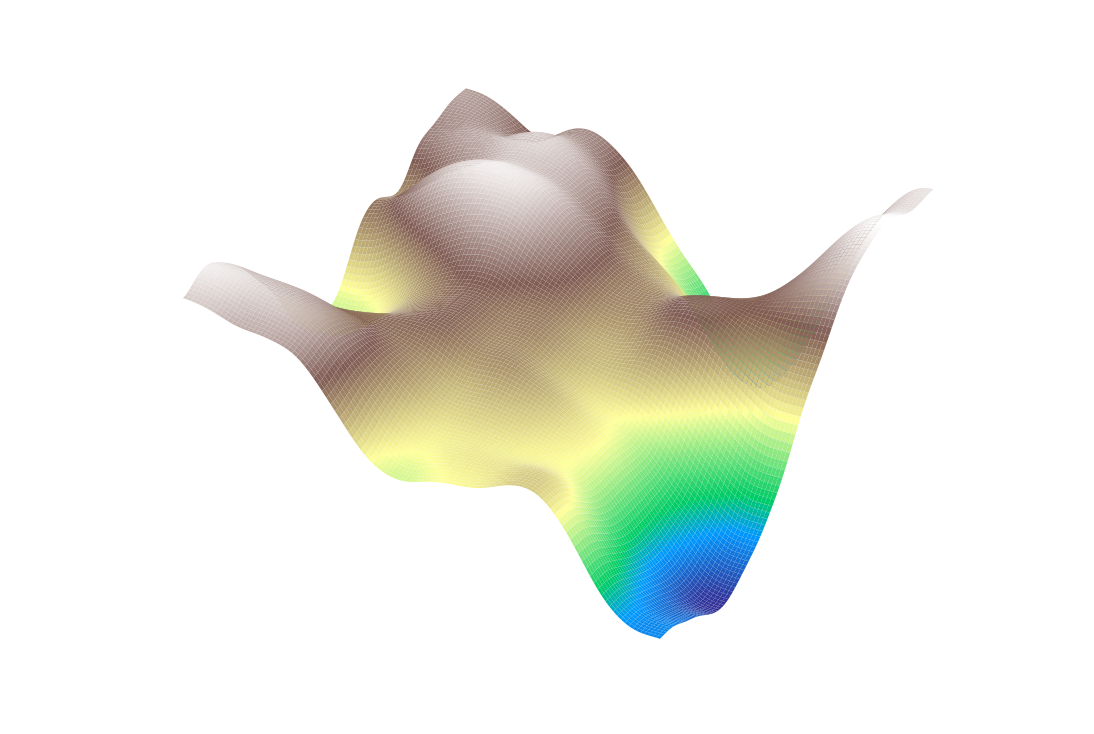

In [752]:
from mpl_toolkits.mplot3d.axes3d import *
from matplotlib import cm

# fix the kernel dimension
kernel = 12
dim = 120
fine_noise = np.random.rand(dim,dim)
#creathe smaller matrices and upscale it with the function we defined above
medium_noise = upscale_matrix(np.random.rand(int(dim/2),int(dim/2)),2)
large_noise = upscale_matrix(np.random.rand(int(dim/4),int(dim/4)) ,4)
very_large_noise = upscale_matrix(np.random.rand(int(dim/8),int(dim/8)) ,8)
# convolve all the layers of the noise, with different sigma values 
very_large_noise_f = barthann_filter(very_large_noise,kernel)
large_noise_f = bartlett_filter(large_noise,kernel)
medium_noise_f = bartlett_filter(medium_noise,kernel)
fine_noise_f = bartlett_filter(fine_noise,kernel)

#and average the results 
result = matrix_average(matrix_average(matrix_average(fine_noise,medium_noise_f),large_noise_f),very_large_noise_f)

fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig)
# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.axis('off')
#use a meshgrid to generate x and y coordinates, z are pulled straight from the matrix
X = np.arange(0, dim, 1)
Y = np.arange(0, dim, 1)
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, cosine_filter(result,60), rstride=1, cstride=1, cmap='terrain',linewidth=1, antialiased=True)
ax.view_init(elev=50)
plt.show()

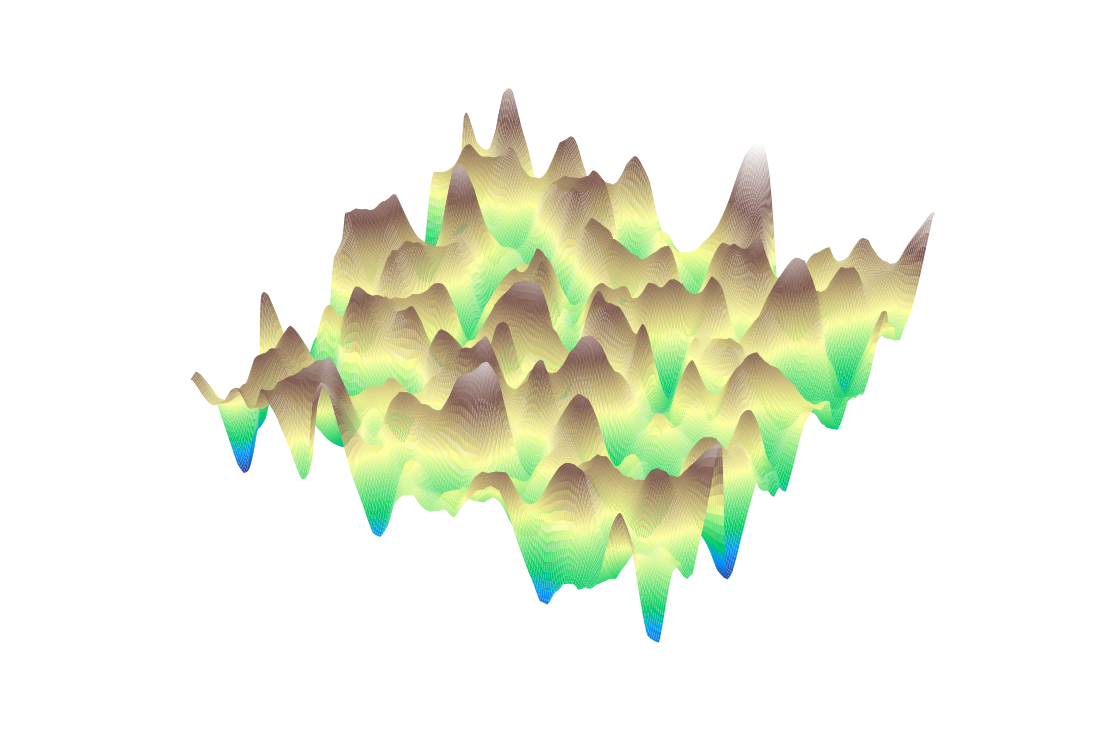

In [753]:
from mpl_toolkits.mplot3d.axes3d import *
from matplotlib import cm

# fix the kernel dimension
kernel = 20
dim = 240
fine_noise = np.random.rand(dim,dim)
#creathe smaller matrices and upscale it with the function we defined above
medium_noise = upscale_matrix(np.random.rand(int(dim/2),int(dim/2)),2)
large_noise = upscale_matrix(np.random.rand(int(dim/4),int(dim/4)) ,4)
very_large_noise = upscale_matrix(np.random.rand(int(dim/8),int(dim/8)) ,8)
# convolve all the layers of the noise, with different sigma values 
very_large_noise_f = gaussian_filter(very_large_noise,kernel, sigma=8)
large_noise_f = gaussian_filter(large_noise,kernel, sigma=2)
#medium_noise_f = gaussian_filter(medium_noise,kernel, sigma=1)
fine_noise_f = gaussian_filter(fine_noise,kernel, sigma=1)

#and average the results 
result = matrix_average(matrix_average(matrix_average(fine_noise,medium_noise),large_noise_f),very_large_noise_f)

fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig)
# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.axis('off')
#use a meshgrid to generate x and y coordinates, z are pulled straight from the matrix
X = np.arange(0, dim, 1)
Y = np.arange(0, dim, 1)
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, result, rstride=1, cstride=1, cmap='terrain',linewidth=1, antialiased=True)
ax.view_init(elev=60)
plt.show()

<Figure size 720x720 with 0 Axes>

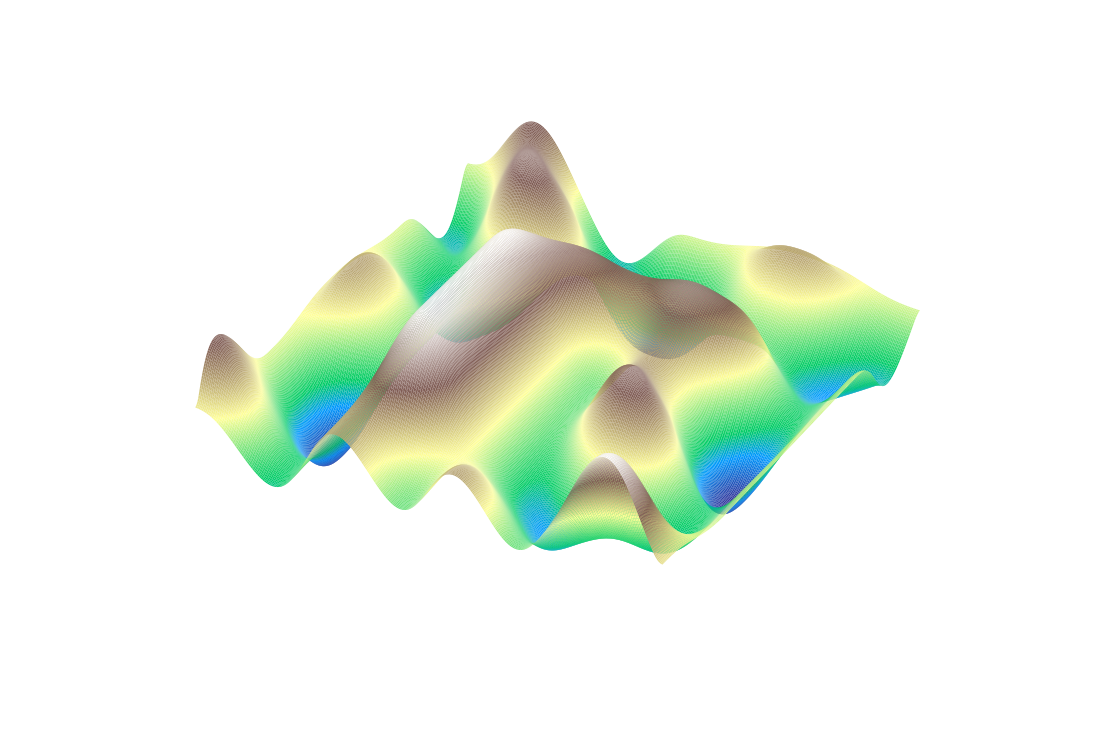

In [754]:
from mpl_toolkits.mplot3d.axes3d import *
from matplotlib import cm
#set the dimension 
loc_dim = 300

lin = np.linspace(0,4,loc_dim,endpoint=False)
x,y = np.meshgrid(lin,lin) 
plt.figure(figsize=(10,10))
result = perlin(x,y,seed=2)

fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig)
# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.axis('off')
#use a meshgrid to generate x and y coordinates, z are pulled straight from the matrix
X = np.arange(0, loc_dim, 1)
Y = np.arange(0, loc_dim, 1)
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, gaussian_filter(result,12, sigma=8), rstride=1, cstride=1, cmap='terrain',linewidth=1, antialiased=True)
ax.view_init(elev=60)
plt.show()

### Performance review 


In [755]:
def create_perlin_noise(dim):
  lin = np.linspace(0,8,dim,endpoint=False)
  x,y = np.meshgrid(lin,lin) 
  return perlin(x,y,seed=2)

def create_layered_gaussian_noise(dim):
  fine_noise = np.random.rand(dim,dim)
  medium_noise = upscale_matrix(np.random.rand(int(dim/2),int(dim/2)),2)
  large_noise = upscale_matrix(np.random.rand(int(dim/4),int(dim/4)) ,4)

  large_noise_f = gaussian_filter(large_noise,kernel, sigma=3)
  medium_noise_f = gaussian_filter(medium_noise,kernel, sigma=1)
  fine_noise_f = gaussian_filter(fine_noise,kernel, sigma=1)
  return matrix_average(matrix_average(fine_noise_f,medium_noise_f),large_noise_f)


100 loops, best of 5: 8.38 ms per loop


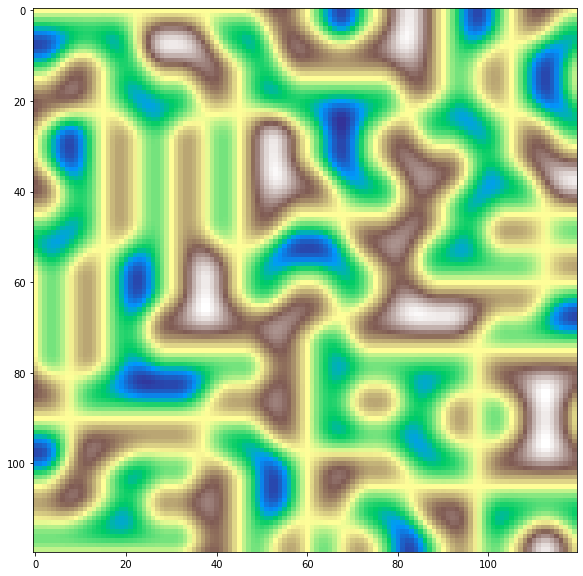

In [756]:
%timeit create_perlin_noise(120)
plt.figure(figsize=(10,10))
plt.imshow(create_perlin_noise(120),origin='upper',cmap='terrain')

10 loops, best of 5: 25.6 ms per loop


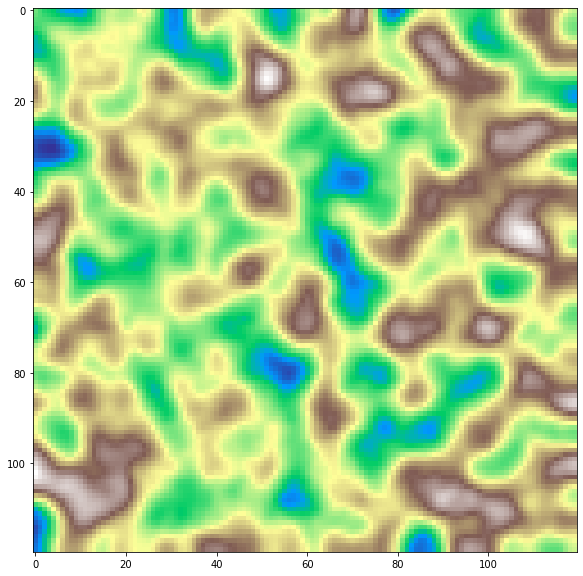

In [757]:
%timeit create_layered_gaussian_noise(120)
plt.figure(figsize=(10,10))
plt.imshow(create_layered_gaussian_noise(120),origin='upper',cmap='terrain')

We can clearly see from the results that the perlin algorithm is around 3 time faster than the layered gaussian approach. However is difficult to match the result between the two, so the result is quite empirical. 

### Plotting noise as a "crt static signal" 
one simple application I wanted to experiment was creating a video that simulates static noise of an old crt tv. Thats simply done by making multiple images and displaying them with some tools for gif making. 
Unfortunately displaying a gif in jupyter notebook is not strightfowrward, it must be opened outside. 

In [758]:
# making a sequence of images 
import os
num_images = 50 
image_size = 100
names = []
for i in range(num_images):
  simple_noise = np.random.rand(image_size,image_size)
  name = "noise"+str(i)+".png"
  plt.imsave(name,simple_noise,cmap="Greys")
  names.append(os.getcwd() + '/' + name)

In [759]:
# and save as gif
import imageio
images = []
for name in names:
    images.append(imageio.imread(name))
imageio.mimsave('static_noise.gif', images)